
# Purpose: Comparing OLS, Ridge, NN, SVM Models for Cambodia and Ethiopia Farming Data. 

### Names: Betsy Alter, Andres Perez, Joshua Short, Su Jung Teng.

#### Date: April 20, 2023

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score #R squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
#Set Working Directory
#os.chdir("E:\...")

#REMEMBER TO GET RID OF ALL THE NAs IN YOUR DATASET


#Load Data
df = pd.read_csv('everything_CAM.csv')

In [3]:
df = df.loc[:, df.nunique() != 1]

In [4]:
print("Number of columns:", df.shape[1])

Number of columns: 296


In [5]:
# Check for missing values (You should have no missing values)
print(df.isnull().sum())

Latitude     0
Longitude    0
gender       0
age_resp     0
treat        0
            ..
M2022_08     0
M2022_09     0
M2022_10     0
M2022_11     0
M2022_12     0
Length: 296, dtype: int64


In [7]:
#If you do then use this line to get rid of them
#df = df.fillna(0)

# Cambodia Models with data merged with CHIRPS

### OLS Regression

Ordinary least squares (OLS) regression is a process in which a straight line is used to estimate the relationship between two interval/ratio level variables. The "best-fitting line" is the line that minimizes the sum of the squared errors 

For estimation, the following assumptions are imposed:
(1) Linear relationship: We assume that the relationship between the dependent variable and independent variables is linear; 
(2) Independence: Observations are independent of each other;
(3) Homoskedasticity: The error term has constant variance across all levels of the independent variables; (4) Normality: The error term is normally distributed. 

In [6]:
y = df[['F9']]
X = df.drop(columns=["F9"])

In [7]:
# Create training and test sets with 0.5 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create linear regression object called ols
ols = LinearRegression(fit_intercept=True)

# Train the model using the training sets
ols.fit(X_train, y_train)

# Perform cross-validation and calculate R-squared scores
ols_scores = cross_val_score(ols, X_train, y_train, cv=10, scoring='r2')
mean_r2 = np.mean(ols_scores)
print("Cross-validated OLS R-squared scores:", ols_scores)
print("Mean R-squared score:", mean_r2)

# Make predictions on test set
y_predict = ols.predict(X_test)

# Calculate R-squared score on test set
r2 = r2_score(y_test, y_predict)
print("R-squared score on test set:", r2)

Cross-validated OLS R-squared scores: [-3.24689307e-01 -3.27177941e-01 -2.85491295e+00  1.33092200e-01
 -4.02639239e-01 -1.43723243e+00 -8.81020943e-01 -3.25885318e-01
 -4.85228249e+02 -1.32826920e+00]
Mean R-squared score: -49.2976983821712
R-squared score on test set: -0.7975992795410183


In [8]:
y_pred = ols.predict(X_test)
# print("Mean Squared Error: {}".format(mse))
mse = mean_squared_error(y_test, y_pred)

# Compute and print the R^2
r2 = ols.score(X_test, y_test)
print('mse is: ', mse, 'r2 is: ', r2)

mse is:  0.3306127565104327 r2 is:  -0.7975992795410183


### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [45]:
#df = pd.read_csv("modified_data2.csv")
# Create arrays for features (Lighted) and target variable (Temp)
yr = df[['F9']]
Xr = df.drop(columns=["F9"])

# Add in 2nd-degree polynomial of the X variables
Xr = pd.DataFrame(PolynomialFeatures(degree = 2).fit_transform(Xr))
  
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.3)

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(Xr)
r_squared = r2_score(yr, y_pred)
print("R-squared score on test set:", r_squared)
ridge_mse = mean_squared_error(yr, y_pred)
print('MSE is: ', ridge_mse)

R-squared score on test set: -146.2061616654851
MSE is:  27.704820796071257


In [10]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print("Cross-validated Polynomial Regression scores:", (-1)*ridge_scores)

Cross-validated Polynomial Regression scores: [9.06405123e+02 1.32667271e-01 7.03221162e+03 1.27389023e+02
 2.29227453e+02]


### Neural Network

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. Neural networks can deal with nonlinearities. So if your data will have some nonlinear dependencies, neural networks should perform better than regression.

In [13]:
# load the dataset
data = df
datav = df.drop(columns=["F9"])

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(datav)

# split the standardized dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data.F9, test_size=0.2, random_state=11)

# create a neural network model with L2 regularization
model = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.1, solver='adam', random_state=11)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the performance metrics
nn_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", nn_r2)

nn_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", nn_mse)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print('Confusion matrix:\n', cm)

R-squared score on test set: 0.4517374517374517
MSE on test set: 0.1056338028169014
Accuracy: 0.8943661971830986
Precision: 0.9326923076923077
Recall: 0.9238095238095239
F1 Score: 0.9282296650717704
ROC AUC: 0.8673101673101675
Confusion matrix:
 [[97  8]
 [ 7 30]]


### Random Forest

A supervised learning algorithm that works on the concept of bagging. In bagging, a group of models is trained on different subsets of the dataset, and the final output is generated by collating the outputs of all the different models.

In [14]:
yf = df[['F9']]
Xf = df.drop(columns=["F9"])
X_train, X_test, y_train, y_test = train_test_split(Xf, df.F9, test_size=0.2, random_state=42)

In [15]:
rf_model = RandomForestClassifier(random_state=11)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [16]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [17]:
mse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("R-squared: ", r2)
print("Mean Squared Error (MSE): ", mse)

Accuracy:  0.8802816901408451
Precision:  0.8779569462227913
R-squared:  0.3990540204132438
Mean Squared Error (MSE):  0.11971830985915492


In [18]:
feature_names = Xf.columns.tolist() 

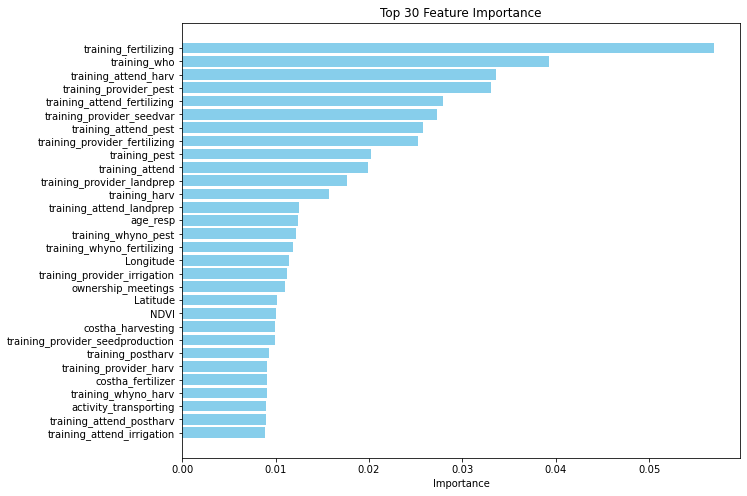

In [19]:
# Get importance scores
importances = rf_model.feature_importances_

# Create a pandas DataFrame for easier data manipulation
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance scores and select the top 30
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis so the feature with the highest importance is at the top
plt.show()

### SVM (Support Vector Machine)

Machine learning algorithm used for regression analysis. It is different from traditional linear regression methods as it finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.

In [20]:
y = data[['F9']]
X = data.drop(columns=["F9"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to tune
hyperparams = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Perform hyperparameter tuning using k-fold cross-validation
grid_search = GridSearchCV(SVC(probability=True), hyperparams, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Make predictions on test set
y_pred = best_svc.predict(X_test)
y_prob = best_svc.predict_proba(X_test)[:, 1]

# Calculate performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)


svm_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", svm_r2)

svm_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", svm_mse)

# Print performance metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)
print('ROC AUC:', auc)
print('Confusion matrix:\n', cm)

R-squared score on test set: 0.5613899613899613
MSE on test set: 0.08450704225352113
Accuracy: 0.9154929577464789
Precision: 0.9345794392523364
Recall: 0.9523809523809523
F1 score: 0.9433962264150944
ROC AUC: 0.9528957528957529
Confusion matrix:
 [[100   5]
 [  7  30]]


# Ethiopia data set
Not able to use CHIRPS as it is not available

In [46]:
df = pd.read_csv('everything_ethiopia.csv')

Learn variable: "Are you (or another household member) in need of training on improved agricultural practices in malt barley production?"
1 if yes 2 if no

In [47]:
df = df.loc[:, df.nunique() != 1]

In [48]:
print("Number of columns:", df.shape[1])

Number of columns: 167


In [49]:
df = df.apply(pd.to_numeric, errors='coerce')

In [50]:
df = df.drop(df.columns[0], axis=1)

In [51]:
df = df.fillna(0)

In [52]:
df.head()

,treat,GPS_Latitude,GPS_Longitude,GPS_Accuracy,GPS_Altitude,gender_resp,respondentishead,gender_head,age_head,attendedschool_head,...,h7_2,h7_3,h7_4,h7_5,h7_6,h7_7,h7_8,h7_9,learn,ndvi
0,1,7.334400,39.208542,4.8,3039.600098,1,1,0,35,1,...,0,0,0,0,0,0,0,0,0,0.258366
1,1,7.334400,39.208542,4.8,3039.600098,1,1,0,35,1,...,0,0,0,0,0,0,0,0,0,0.258366
2,1,7.334400,39.208542,4.8,3039.600098,1,1,0,35,1,...,0,0,0,0,0,0,0,0,0,0.258366
3,1,7.334400,39.208542,4.8,3039.600098,1,1,0,35,1,...,0,0,0,0,0,0,0,0,0,0.258366
4,1,7.249927,38.993832,5.0,2877.600098,1,1,0,35,1,...,1,0,1,0,0,0,0,0,2,0.291843


In [53]:
X = df.drop(columns=["learn"])
y = df[['learn']]

### OLS Regression

In [54]:
# Create training and test sets with 0.5 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create linear regression object called ols
ols = LinearRegression(fit_intercept=True)

# Train the model using the training sets
ols.fit(X_train, y_train)

# Perform cross-validation and calculate R-squared scores
ols_scores = cross_val_score(ols, X_train, y_train, cv=10, scoring='r2')
mean_r2 = np.mean(ols_scores)
print("Cross-validated OLS R-squared scores:", ols_scores)
print("Mean R-squared score:", mean_r2)

# Make predictions on test set
y_predict = ols.predict(X_test)

# Calculate R-squared score on test set
r2 = r2_score(y_test, y_predict)
print("R-squared score on test set:", r2)

Cross-validated OLS R-squared scores: [ 0.83246969  0.63232444  0.80810806  0.52653434  0.70823645  0.73138659
  0.73227509 -1.37690678  0.52076442  0.71071753]
Mean R-squared score: 0.48259098252406735
R-squared score on test set: 0.39943705428298826


In [55]:
y_pred = ols.predict(X_test)
# print("Mean Squared Error: {}".format(mse))
mse = mean_squared_error(y_test, y_pred)

# Compute and print the R^2
r2 = ols.score(X_test, y_test)
print('mse is: ', mse, 'r2 is: ', r2)

mse is:  0.295985779813303 r2 is:  0.39943705428298826


### Ridge Regression

####  Get the 5 fold CV scores

In [54]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print("Cross-validated Polynomial Regression scores:", (-1)*ridge_scores)

Cross-validated Polynomial Regression scores: [0.38819174 0.12664777 0.13359091 0.18552922 0.15714885]


In [55]:
yr = df[['learn']]
Xr = df.drop(columns=["learn", "apply"])

# Add in 2-degree polynomial of the X variables
Xr = pd.DataFrame(PolynomialFeatures(degree = 2).fit_transform(Xr))
  
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.3)

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
ridge.fit(X_train, y_train)

# Performance metrics
y_pred = ridge.predict(Xr)
ridge_r2 = r2_score(yr, y_pred)
print("R-squared score on test set:", ridge_r2)
ridge_mse = mean_squared_error(yr, y_pred)
print('MSE is: ', ridge_mse)

R-squared score on test set: 0.7515685489815215
MSE is:  0.05032948375910233


### Neural Networks

In [56]:
data = df.drop(columns=["apply"])
datadv = df.drop(columns=["apply","learn"])

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(datadv)

# split the standardized dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data.learn, test_size=0.3, random_state=11)

# create a neural network model with L2 regularization
model = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.1, solver='adam', random_state=11)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate performance metrics
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")
cm = confusion_matrix(y_test, y_pred)

nn_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", nn_r2)


nn_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", nn_mse)

# print the performance metrics
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion matrix:\n', cm)

R-squared score on test set: 0.6348696404300013
MSE on test set: 0.07614213197969544
Accuracy: 0.9314720812182741
Precision: 0.9286395809095459
Recall: 0.9314720812182741
F1 Score: 0.9299761021111282
Confusion matrix:
 [[  0   0   1]
 [  0 269  11]
 [  0  15  98]]


### Random Forest

In [57]:
yf = df[['learn']]
Xf = df.drop(columns=["learn", "apply"])
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size = 0.3)

In [58]:
feature_names = Xf.columns.tolist() 

In [59]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

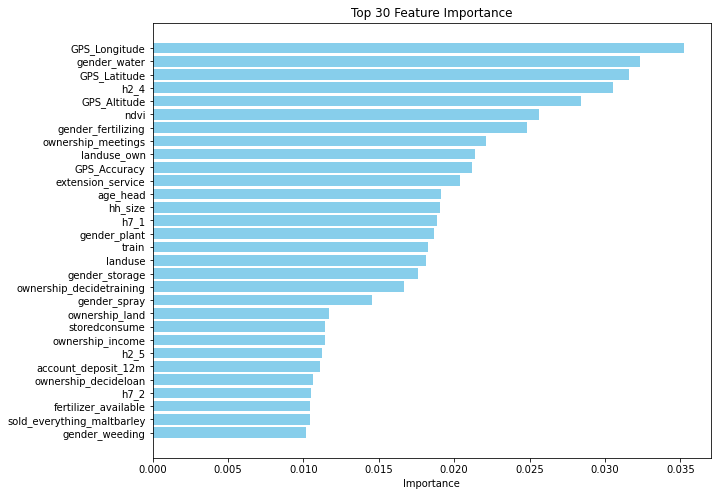

In [60]:
# Fit the model
rf_model = RandomForestClassifier(random_state=11)
rf_model.fit(X_train, y_train)

# Get importance scores
importances = rf_model.feature_importances_

# Create a pandas DataFrame for easier data manipulation
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance scores and select the top 30
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis so the feature with the highest importance is at the top
plt.show()


In [61]:
mse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("R-squared: ", r2)
print("Mean Squared Error (MSE): ", mse)

Accuracy:  0.9949238578680203
Precision:  0.9949582723909489
R-squared:  0.9733720812354273
Mean Squared Error (MSE):  0.005076142131979695


### SVM

In [62]:
y = data[['learn']]
X = data.drop(columns=["learn"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to tune
hyperparams = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Perform hyperparameter tuning using k-fold cross-validation
grid_search = GridSearchCV(SVC(probability=True), hyperparams, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Make predictions on test set
y_pred = best_svc.predict(X_test)
y_prob = best_svc.predict_proba(X_test)[:, 1]

# Calculate performance metrics
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred, average = "weighted")
rec = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")
svm_cm = confusion_matrix(y_test, y_pred)


svm_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", svm_r2)

svm_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", svm_mse)

# Print performance metrics
print('Accuracy:', svm_acc)
print('Precision:', svm_prec)
print('Recall:', rec)
print('F1 score:', f1)
print('Confusion matrix:\n', svm_cm)

R-squared score on test set: 0.3603097289871362
MSE on test set: 0.1319796954314721
Accuracy: 0.868020304568528
Precision: 0.8648623359610751
Recall: 0.868020304568528
F1 score: 0.8609110672562449
Confusion matrix:
 [[  0   1   0]
 [  0 270  12]
 [  0  39  72]]


# Merged Dataset with Cambodia MARS Data & Ethiopian Heineken Data

We are able to test our model out of sample on a different dataset, which will serve as a robustness check and assess heterogeneity in prediction across different countries and crops.

In [57]:
df = pd.read_csv('merged_heineken_mars.csv')

Note: DATASET = 1 corresponds to MARS, DATASET = 0 corresponds to HEINEKEN

In [58]:
df = df.drop(columns=["Unnamed: 0"])

In [59]:
df.head()

,Latitude,Longitude,DATASET,treat,fies_didnoteat,fies_notenoughfood,fies_eathealthy,fies_fewkinds,fies_skipmeals,fies_ateless,...,challenge_priceseeds,challenge_getloan,challenge_affordloan,challenge_labor,challenge_costlabor,challenge_postharv,challenge_disease,challenge_pest,challenge_farmadvise,challenge_weather
0,13.735540,103.244825,1,1,2,2,2,2,2,2,...,1,0,0,0,0,0,0,1,0,1
1,13.736765,103.240871,1,1,2,1,2,2,2,2,...,0,0,0,0,0,0,1,1,0,1
2,13.736525,103.242887,1,1,2,2,2,2,2,2,...,1,0,0,0,0,0,0,0,0,0
3,13.736398,103.242906,1,1,2,1,1,1,2,2,...,0,0,0,0,0,0,0,1,0,0
4,13.736014,103.243147,1,1,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,1


##  MARS as training set and Heineken as test set

### OLS: Out of Sample Metrics

In [66]:
y = df[['learn']]
X = df.drop(columns=["learn"])

X_train = X[df['DATASET'] == 1]
y_train = y[df['DATASET'] == 1]

X_test = X[df['DATASET'] == 0]
y_test = y[df['DATASET'] == 0]

# Create linear regression object called ols
ols = LinearRegression(fit_intercept=True)

# Train the model using the training sets
ols.fit(X_train, y_train)

# Perform cross-validation and calculate R-squared scores
ols_scores = cross_val_score(ols, X_train, y_train, cv=10, scoring='r2')
mean_r2 = np.mean(ols_scores)
print("Cross-validated OLS R-squared scores:", ols_scores)
print("Mean R-squared score:", mean_r2)

# Make predictions on test set
y_predict = ols.predict(X_test)

# Calculate R-squared score on test set
r2 = r2_score(y_test, y_predict)
print("R-squared score on test set:", r2)

# Calculate MSE on test set
y_pred = ols.predict(X_test)
# print("Mean Squared Error: {}".format(mse))
mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", mse)

Cross-validated OLS R-squared scores: [ 0.38034316  0.58994238  0.41209482  0.17292913  0.65739099  0.62361996
  0.26759523  0.40320314  0.55962095 -0.20524384]
Mean R-squared score: 0.386149592200031
R-squared score on test set: -21.831864383945003
MSE on test set: 4.625484989886868


### Ridge

In [67]:
# Add in 3-degree polynomial of the X variables
Xr = pd.DataFrame(PolynomialFeatures(degree = 3).fit_transform(X))
  
# Create training and test sets
X_train = Xr[df['DATASET'] == 1]
y_train = y[df['DATASET'] == 1]

X_test = Xr[df['DATASET'] == 0]
y_test = y[df['DATASET'] == 0]

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
ridge.fit(X_train, y_train)

# The coefficients
ridge.coef_
#ridge.r

y_pred = ridge.predict(Xr)
ridge_r2 = r2_score(y, y_pred)
print("R-squared score on test set:", ridge_r2)
ridge_mse = mean_squared_error(y, y_pred)
print('MSE is: ', ridge_mse)

R-squared score on test set: -25.07542483488649
MSE is:  6.556480726640376


### Neural Network

In [68]:
# standardize the data
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

# split the standardized dataset into training and testing sets
X_train = Xn[df['DATASET'] == 1]
X_test = Xn[df['DATASET'] == 0]

# create a neural network model with L2 regularization
model = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.1, solver='adam', random_state=120)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate performance metrics
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")
cm = confusion_matrix(y_test, y_pred)

nn_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", nn_r2)

nn_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", nn_mse)

# print the performance metrics
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion matrix:\n', cm)

R-squared score on test set: -1.8087962457710356
MSE on test set: 0.5690312738367659
Accuracy: 0.43554538520213576
Precision: 0.5797518943253958
Recall: 0.43554538520213576
F1 Score: 0.4570918938511998
Confusion matrix:
 [[  0   0   2]
 [  0 361 585]
 [  0 153 210]]


### Random Forest

In [69]:
X_train = X[df['DATASET'] == 1]
y_train = y[df['DATASET'] == 1]

X_test = X[df['DATASET'] == 0]
y_test = y[df['DATASET'] == 0]

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [72]:
mse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("R-squared: ", r2)
print("Mean Squared Error (MSE): ", mse)

Accuracy:  0.2776506483600305
Precision:  0.4579787053659756
R-squared:  -2.5881807268361885
Mean Squared Error (MSE):  0.7269260106788711


### SVM

In [73]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to tune
hyperparams = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Perform hyperparameter tuning using k-fold cross-validation
grid_search = GridSearchCV(SVC(probability=True), hyperparams, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Make predictions on test set
y_pred = best_svc.predict(X_test)
y_prob = best_svc.predict_proba(X_test)[:, 1]

# Calculate performance metrics
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred, average = "weighted")
rec = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")
svm_cm = confusion_matrix(y_test, y_pred)


svm_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", svm_r2)

svm_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", svm_mse)

# Print performance metrics
print('Accuracy:', svm_acc)
print('Precision:', svm_prec)
print('Recall:', rec)
print('F1 score:', f1)
print('Confusion matrix:\n', svm_cm)

R-squared score on test set: -2.591945869256793
MSE on test set: 0.7276887871853547
Accuracy: 0.2768878718535469
Precision: 0.07666689357958621
Recall: 0.2768878718535469
F1 score: 0.1200839874346924
Confusion matrix:
 [[  0   0   2]
 [  0   0 946]
 [  0   0 363]]


##  MARS as test set and Heineken as training set

### OLS

In [60]:
y = df[['learn']]
X = df.drop(columns=["learn"])

X_train = X[df['DATASET'] == 0]
y_train = y[df['DATASET'] == 0]

X_test = X[df['DATASET'] == 1]
y_test = y[df['DATASET'] == 1]

# Create linear regression object called ols
ols = LinearRegression(fit_intercept=True)

# Train the model using the training sets
ols.fit(X_train, y_train)

# Perform cross-validation and calculate R-squared scores
ols_scores = cross_val_score(ols, X_train, y_train, cv=10, scoring='r2')
mean_r2 = np.mean(ols_scores)
print("Cross-validated OLS R-squared scores:", ols_scores)
print("Mean R-squared score:", mean_r2)

# Make predictions on test set
y_predict = ols.predict(X_test)

# Calculate R-squared score on test set
r2 = r2_score(y_test, y_predict)
print("R-squared score on test set:", r2)

# Calculate MSE on test set
y_pred = ols.predict(X_test)
# print("Mean Squared Error: {}".format(mse))
mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", mse)

Cross-validated OLS R-squared scores: [ 0.08037875  0.17018217  0.22565397  0.14385277  0.00659992 -0.02169882
  0.12650711 -0.54396727  0.22365633  0.0859205 ]
Mean R-squared score: 0.0497085430860104
R-squared score on test set: -2.954584808814272e+23
MSE on test set: 2.779842627080638e+22


### Ridge

In [63]:
# Add in 3-degree polynomial of the X variables
Xr = pd.DataFrame(PolynomialFeatures(degree = 3).fit_transform(X))
  
# Create training and test sets
X_train = Xr[df['DATASET'] == 0]
y_train = y[df['DATASET'] == 0]

X_test = Xr[df['DATASET'] == 1]
y_test = y[df['DATASET'] == 1]

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
ridge.fit(X_train, y_train)

# The coefficients
ridge.coef_
#ridge.r

y_pred = ridge.predict(Xr)
ridge_r2 = r2_score(y, y_pred)
print("R-squared score on test set:", ridge_r2)
ridge_mse = mean_squared_error(y, y_pred)
print('MSE is: ', ridge_mse)

R-squared score on test set: -2055775840103435.2
MSE is:  516910261645974.1


### Neural Network

In [76]:
# standardize the data
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

# split the standardized dataset into training and testing sets
X_train = Xn[df['DATASET'] == 0]
X_test = Xn[df['DATASET'] == 1]

# create a neural network model with L2 regularization
model = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.1, solver='adam', random_state=11)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate performance metrics
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")
cm = confusion_matrix(y_test, y_pred)

nn_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", nn_r2)

nn_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", nn_mse)

# print the performance metrics
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('Confusion matrix:\n', cm)

R-squared score on test set: -8.759442993907749
MSE on test set: 0.9182242990654206
Accuracy: 0.12383177570093458
Precision: 0.7626075680369261
Recall: 0.12383177570093458
F1 Score: 0.0671995170981292
Confusion matrix:
 [[  0   0   0]
 [  1  85   4]
 [ 12 733  21]]


### Random Forest

In [77]:
X_train = X[df['DATASET'] == 0]
y_train = y[df['DATASET'] == 0]

X_test = X[df['DATASET'] == 1]
y_test = y[df['DATASET'] == 1]

In [78]:
rf_model = RandomForestClassifier(random_state=12)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

In [79]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [80]:
mse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("R-squared: ", r2)
print("Mean Squared Error (MSE): ", mse)

Accuracy:  0.11214953271028037
Precision:  0.7940370966319873
R-squared:  -8.436611546272124
Mean Squared Error (MSE):  0.8878504672897196


In [81]:
feature_names = X.columns.tolist() 

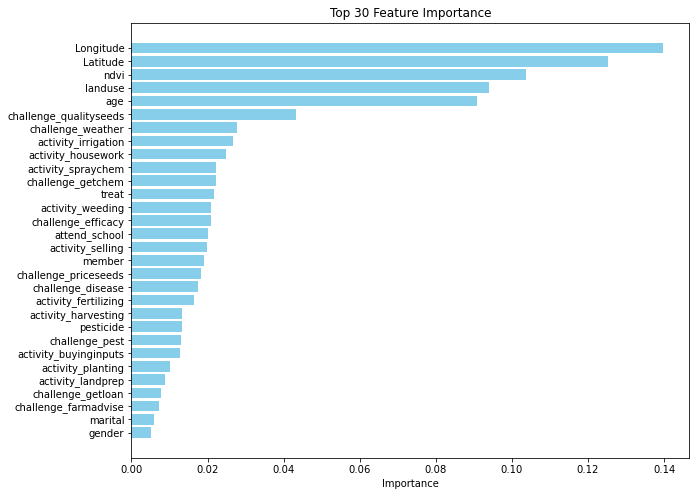

In [82]:
# Get importance scores
importances = rf_model.feature_importances_

# Create a pandas DataFrame for easier data manipulation
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance scores and select the top 30
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis so the feature with the highest importance is at the top
plt.show()

### SVM

In [83]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to tune
hyperparams = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Perform hyperparameter tuning using k-fold cross-validation
grid_search = GridSearchCV(SVC(probability=True), hyperparams, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Make predictions on test set
y_pred = best_svc.predict(X_test)
y_prob = best_svc.predict_proba(X_test)[:, 1]

# Calculate performance metrics
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred, average = "weighted")
rec = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")
svm_cm = confusion_matrix(y_test, y_pred)


svm_r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", svm_r2)

svm_mse = mean_squared_error(y_test, y_pred)
print("MSE on test set:", svm_mse)

# Print performance metrics
print('Accuracy:', svm_acc)
print('Precision:', svm_prec)
print('Recall:', rec)
print('F1 score:', f1)
print('Confusion matrix:\n', svm_cm)

R-squared score on test set: -8.511111111111115
MSE on test set: 0.8948598130841121
Accuracy: 0.10514018691588785
Precision: 0.011054458904707834
Recall: 0.10514018691588785
F1 score: 0.020005532394143564
Confusion matrix:
 [[ 90   0]
 [766   0]]
